In [1]:
pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import *
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

In [4]:
def diffuser(n):
    diffuser_c = QuantumCircuit(n)
    for qubit in range(n):
        diffuser_c.h(qubit)
    for qubit in range(n):
        diffuser_c.x(qubit)
    diffuser_c.h(n-1)
    diffuser_c.mct(list(range(n-1)), n-1)
    diffuser_c.h(n-1)
    for qubit in range(n):
        diffuser_c.x(qubit)
    for qubit in range(n):
        diffuser_c.h(qubit)
    
    U_s = diffuser_c.to_gate()
    U_s.name = "U$_s$"
    
    return U_s

In [6]:
qc = QuantumCircuit(q,c)

r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(5/2**5)))-1/2))
for qubit in range(5):
    qc.h(qubit)

for _ in range(r):
      s1_state = Statevector.from_label('11011')
      s1_circuit = Diagonal((-1)**s1_state.data)
      qc.append(s1_circuit,[0,1,2,3,4])
      s2_state = Statevector.from_label('11110')
      s2_circuit = Diagonal((-1)**s2_state.data)
      qc.append(s2_circuit,[0,1,2,3,4])
      s3_state = Statevector.from_label('11010')
      s3_circuit = Diagonal((-1)**s3_state.data)
      qc.append(s3_circuit,[0,1,2,3,4])
      s4_state = Statevector.from_label('11001')
      s4_circuit = Diagonal((-1)**s4_state.data)
      qc.append(s4_circuit,[0,1,2,3,4])
      s5_state = Statevector.from_label('11000')
      s5_circuit = Diagonal((-1)**s5_state.data)
      qc.append(s5_circuit,[0,1,2,3,4])
      
      qc.append(diffuser(5),[0,1,2,3,4])


    

In [7]:
statevector_sim = Aer.get_backend('statevector_simulator')
job = execute(qc,statevector_sim)
result = job.result()
sv = result.get_statevector()
print(sv)

Statevector([-0.06629126-1.44217454e-16j, -0.06629126-2.11316390e-16j,
             -0.06629126-2.12702416e-16j, -0.06629126-2.27759648e-16j,
             -0.06629126-2.29847644e-16j, -0.06629126-2.20618748e-16j,
             -0.06629126-2.02727315e-16j, -0.06629126-2.24723441e-16j,
             -0.06629126-2.45829408e-16j, -0.06629126-1.43764308e-16j,
             -0.06629126-2.47874756e-16j, -0.06629126-2.29540697e-16j,
             -0.06629126-1.88699670e-16j, -0.06629126-2.62737500e-16j,
             -0.06629126-2.28647882e-16j, -0.06629126-2.50644008e-16j,
             -0.06629126-2.22300184e-16j, -0.06629126-1.71437924e-16j,
             -0.06629126-1.73172648e-16j, -0.06629126-1.98638221e-16j,
             -0.06629126-1.42850129e-16j, -0.06629126-2.30765747e-16j,
             -0.06629126-1.01493706e-16j, -0.06629126-2.02454892e-16j,
             -0.41984465-1.11220913e-15j, -0.41984465-1.17056417e-15j,
             -0.41984465-1.22517281e-15j, -0.41984465-1.17861222e-15j,
      

In [8]:
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)

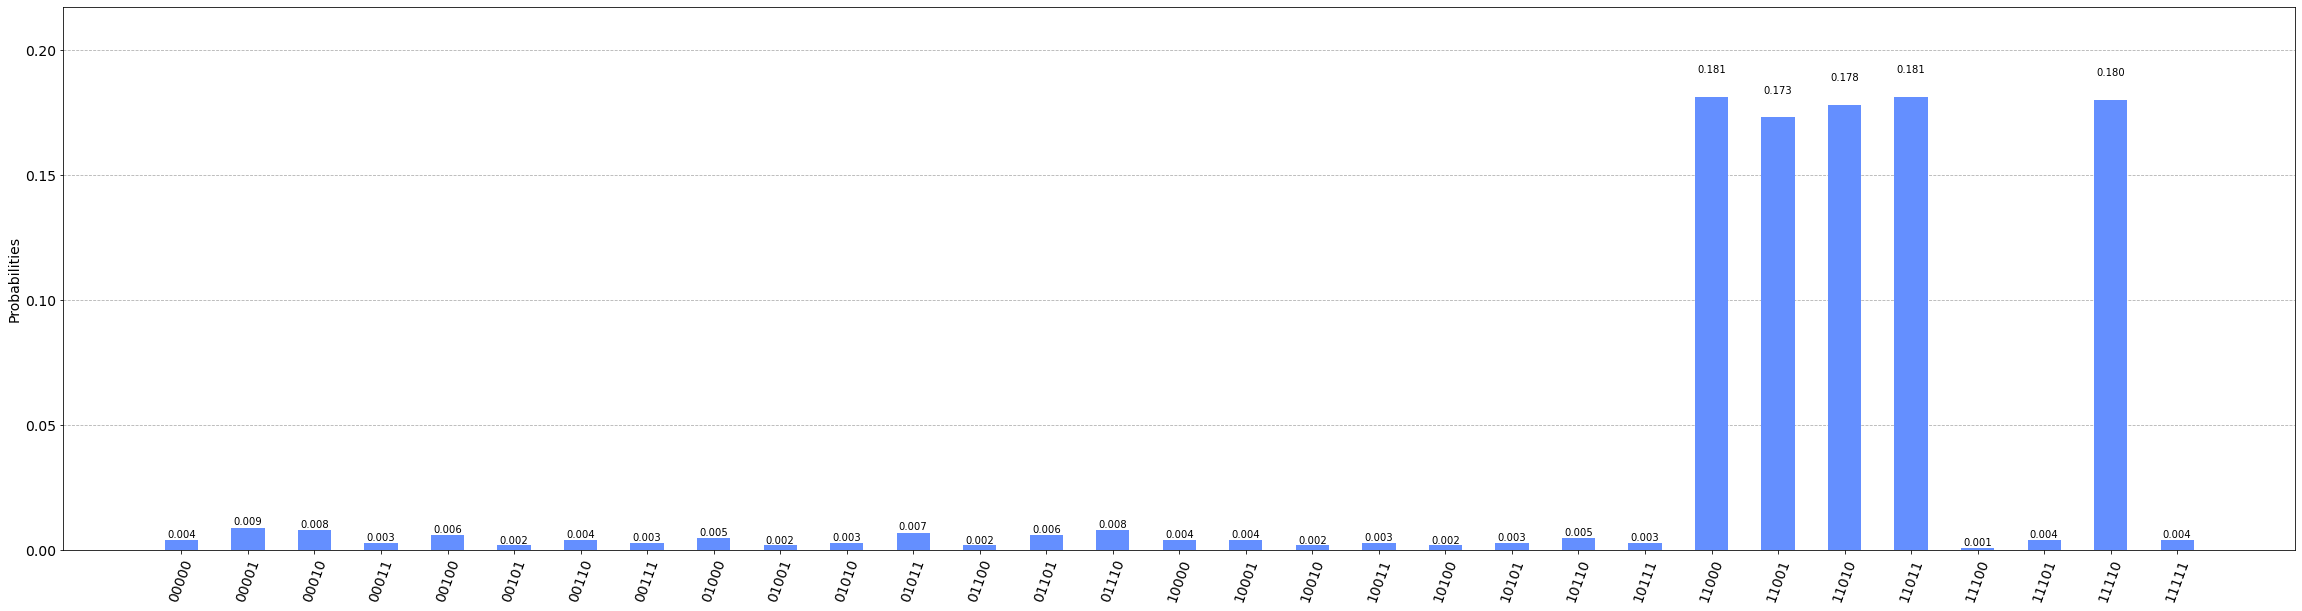

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = execute([qc], backend=backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts,figsize=(40,10))